Basic CV experiment

Accuracy: 0.95 (0.05) [[1.         0.96666667 0.86666667 0.96666667 0.93333333]]


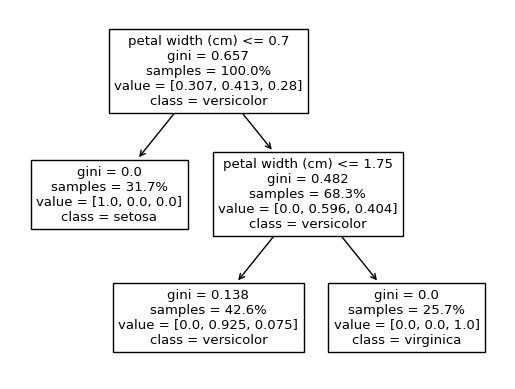

                   importance
sepal length (cm)    0.121352
sepal width (cm)     0.003370
petal length (cm)    0.434053
petal width (cm)     0.441225


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)
data = load_iris()
df_iris = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.Series(data=data.target, name='species')

df_iris, y = shuffle(df_iris, y, random_state=42)

# CV experiment
cls = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2) 
scores = cross_val_score(cls,df_iris, y, cv=5)
print (f"Accuracy: {scores.mean():0.2f} ({scores.std():0.2f}) [{scores}]")

# Decision tree visualization (global fit! Why? ^..^ )
cls.fit(df_iris, y)
plot_tree(cls.estimators_[0],class_names=data.target_names,feature_names=df_iris.columns,proportion=True)
plt.show()

# Feature importance
feature_importances = pd.DataFrame(cls.feature_importances_,index=df_iris.columns)
feature_importances.columns = ['importance']
print (feature_importances)


# Do nie znanych danych, taka wizualizacja jest bardzo dobrym objaśnieniem. Exploratory.
# Zastępuje Analizę statystyczną

In [3]:
print(cls.estimators_[0])

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)
